In [1]:
import os
os.listdir()


['.config', 'Fake.csv', 'True.csv', 'sample_data']

In [2]:
import numpy as np
import pandas as pd


In [6]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
# Add indicator of true or fake
fake_news['isTrue'] = 0
true_news['isTrue'] = 1
# Combine both the Datasets
df = pd.concat([fake_news, true_news], axis=0)
#Dropping unnecessary columns and
df = df.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,isTrue
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [8]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
# Add indicator of true or fake
fake_news['isTrue'] = 0
true_news['isTrue'] = 1
# Combine both the Datasets
df = pd.concat([fake_news, true_news], axis=0)
#Dropping unnecessary columns and
df = df.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,isTrue
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


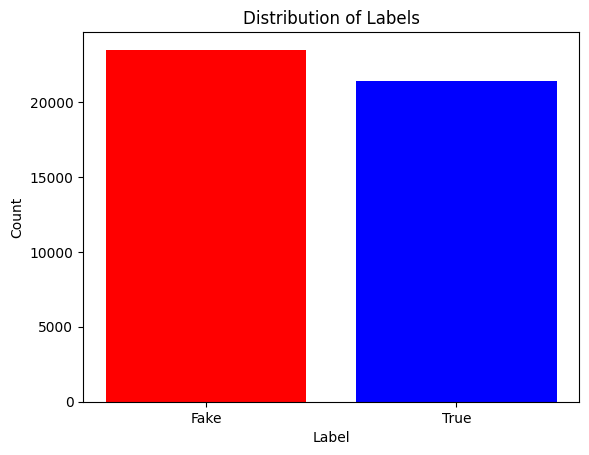

In [12]:
import matplotlib.pyplot as plt

# Count fake and true labels
label_counts = df['isTrue'].value_counts()

# Plot
plt.bar(label_counts.index, label_counts.values, color=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Fake', 'True'])
plt.show()


In [14]:
#Cleaning text to remove any unwanted strings
import re
import string

# Define the text cleaning function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]|\W|https?://\S+|www\.\S+|<.*?>+|\n|\w*\d\w*', '', text)  # Clean unwanted patterns
    return text

# Apply to all rows
df["text"] = df["text"].apply(preprocess_text)


In [15]:
#Prepare Data for Modeling
x = df["text"]
y = df["isTrue"]

In [16]:
#Divide the dataset into 80:20 for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [20]:
#Before training model converting text data to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [21]:
 #Training a LogisticRegression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,y_train)
pred_lr = lr.predict(xv_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      4670
           1       1.00      0.03      0.07      4310

    accuracy                           0.54      8980
   macro avg       0.76      0.52      0.38      8980
weighted avg       0.75      0.54      0.39      8980



0.5367483296213809